In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

from scipy.stats import shapiro
from scipy.stats import skew, norm


from functions import shapiro_wilk, plot_cloud



## EDA

In [2]:
# import data
df = pd.read_csv("airbnb.csv")

quick rewiew at data

In [3]:

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,70820,City View - Sarah's double room.,360195,Sarah,NaN,Windmill Hill,51.43994,-2.59173,Private room,32,7,156,2019-09-12,1.83,4,44
1,117122,City Centre-Waterside Retreat,591555,Marcus,NaN,Clifton,51.45051,-2.61054,Private room,96,1,144,2019-06-09,2.45,1,362
2,176306,The White Room - Central Bristol Art House Ga...,708175,Orla,NaN,Bedminster,51.44101,-2.60121,Private room,29,21,39,2013-01-21,0.37,1,28
3,307634,Peaceful Safe Home & Clear Space 'The Lilac Room',1582810,Wendy,NaN,Easton,51.46641,-2.55533,Private room,30,3,21,2020-09-12,0.42,2,171
4,322906,HUGE Room CENTRAL location House,1156132,Sue And Toby,NaN,Ashley,51.46668,-2.58274,Private room,69,2,80,2015-07-20,0.98,2,71


drop unnecessary columns

In [4]:

df.drop(["id", "host_id","neighbourhood_group", "latitude", "longitude", ], axis = 1, inplace = True)

In [5]:
df.columns

Index(['name', 'host_name', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

## Exploratory Data Analysis

Average price by neighborhood

In [6]:
df.groupby("neighbourhood").mean()["price"]

neighbourhood
Ashley                         130.152866
Avonmouth & Lawrence Weston     81.354839
Bedminster                      80.575758
Bishopston & Ashley Down        79.431373
Bishopsworth                    64.666667
Brislington East               154.352941
Brislington West               117.129032
Central                        116.855000
Clifton                        124.080645
Clifton Down                   110.899083
Cotham                         116.593750
Easton                          74.354839
Eastville                      112.704545
Filwood                        110.111111
Frome Vale                      63.875000
Hartcliffe & Withywood          58.428571
Henbury & Brentry               97.888889
Hengrove & Whitchurch Park      30.333333
Hillfields                      74.142857
Horfield                       101.464286
Hotwells & Harbourside         145.646154
Knowle                          69.000000
Lawrence Hill                  109.341772
Lockleaze           

In [7]:
# neighborhood_and_room_type effect on price
neighborhood_and_room_type = df.groupby(["neighbourhood","room_type"], sort = True)["price"].mean()
neighborhood_and_room_type = pd.DataFrame(neighborhood_and_room_type)

In [8]:
neighborhood_and_room_type.sort_values(by='price', ascending=False).head(15)
    

,,price
neighbourhood,room_type,
Brislington East,Entire home/apt,305.857143
Henbury & Brentry,Entire home/apt,226.333333
Westbury-on-Trym & Henleaze,Private room,200.181818
Windmill Hill,Entire home/apt,199.920000
Eastville,Entire home/apt,182.190476
Southville,Entire home/apt,177.290323
Stoke Bishop,Entire home/apt,175.000000
Hotwells & Harbourside,Entire home/apt,166.432432
Filwood,Entire home/apt,166.000000


In [9]:
neighborhood_and_room_type.sort_values(by='price', ascending=False).tail(15)


,,price
neighbourhood,room_type,
Filwood,Private room,40.250000
Knowle,Private room,38.833333
Brislington West,Private room,38.555556
Bedminster,Private room,35.933333
Brislington East,Private room,35.666667
Hartcliffe & Withywood,Shared room,35.000000
Avonmouth & Lawrence Weston,Private room,34.933333
Henbury & Brentry,Private room,33.666667
Stockwood,Private room,33.500000


In [10]:
pd.set_option('display.max_row', None)
neighborhood_and_room_type

price
neighbourhood               room_type                  
Ashley                      Entire home/apt  157.084034
                            Private room      45.815789
Avonmouth & Lawrence Weston Entire home/apt  124.875000
                            Private room      34.933333
Bedminster                  Entire home/apt  117.777778
                            Private room      35.933333
Bishopston & Ashley Down    Entire home/apt  103.720000
                            Private room      56.076923
Bishopsworth                Entire home/apt  109.400000
                            Private room      32.714286
Brislington East            Entire home/apt  305.857143
                            Hotel room       162.000000
                            Private room      35.666667
Brislington West            Entire home/apt  151.047619
                            Hotel room       112.000000
                            Private room      38.555556
Central                     Entire home/apt  121.077922
                            Hotel room       101.400000
                            Private room     105.228571
                            Shared room       28.000000
Clifton                     Entire home/apt  147.744444
                            Hotel room        81.900000
                            Private room      52.916667
Clifton Down                Entire home/apt  133.861111
                            Hotel room        69.750000
                            Private room      65.787879
Cotham                      Entire home/apt  141.106383
                            Private room      48.823529
Easton                      Entire home/apt  100.314286
                            Private room      40.703704
Eastville                   Entire home/apt  182.190476
                            Private room      49.260870
Filwood                     Entire home/apt  166.000000
                            Private room      40.250000
Frome Vale                  Entire home/apt  100.800000
                            Private room      47.090909
Hartcliffe & Withywood      Entire home/apt  127.000000
                            Private room      30.000000
                            Shared room       35.000000
Henbury & Brentry           Entire home/apt  226.333333
                            Private room      33.666667
Hengrove & Whitchurch Park  Entire home/apt   45.000000
                            Private room      27.400000
Hillfields                  Entire home/apt  112.000000
                            Private room      45.750000
Horfield                    Entire home/apt  142.125000
                            Hotel room        54.500000
                            Private room      88.611111
Hotwells & Harbourside      Entire home/apt  166.432432
                            Hotel room       126.500000
                            Private room     120.560000
                            Shared room       42.000000
Knowle                      Entire home/apt  101.909091
                            Private room      38.833333
Lawrence Hill               Entire home/apt  140.905660
                            Private room      45.000000
Lockleaze                   Entire home/apt   88.333333
                            Private room      71.750000
Redland                     Entire home/apt  129.038462
                            Private room      50.705882
Southmead                   Entire home/apt   74.800000
                            Private room      31.000000
Southville                  Entire home/apt  177.290323
                            Hotel room        58.000000
                            Private room     143.043478
St George Central           Entire home/apt   61.250000
                            Private room      46.666667
St George Troopers Hill     Entire home/apt  157.000000
                            Private room      26.000000
St George West              Entire home/apt   84.142857
                  

In [11]:
pd.reset_option("display.max_rows",)

In [12]:
neighborhood_and_room_type

price
neighbourhood               room_type                  
Ashley                      Entire home/apt  157.084034
                            Private room      45.815789
Avonmouth & Lawrence Weston Entire home/apt  124.875000
                            Private room      34.933333
Bedminster                  Entire home/apt  117.777778
...                                                 ...
Stoke Bishop                Private room      41.333333
Westbury-on-Trym & Henleaze Entire home/apt   96.166667
                            Private room     200.181818
Windmill Hill               Entire home/apt  199.920000
                            Private room      42.925926

[80 rows x 1 columns]

How many nights can you stay at least according to the room types?

In [13]:
room_type_and_minimum_nights = df.groupby(["room_type"])["minimum_nights"].mean().astype(int)
room_type_and_minimum_nights


room_type
Entire home/apt     7
Hotel room          2
Private room        3
Shared room        10
Name: minimum_nights, dtype: int64

How many days of the year are available according to room types

In [14]:
room_type_and_availability_365 = df.groupby(["room_type"])["availability_365"].mean().astype(int)
room_type_and_availability_365

room_type
Entire home/apt    171
Hotel room         146
Private room       169
Shared room        273
Name: availability_365, dtype: int64

## Graphs

**Wordcloud**

Top rated host name and their graph

In [15]:
top_rated_hosts = df.groupby(["host_name"], sort = True)["number_of_reviews"].mean().sort_values()
top_rated_hosts = pd.DataFrame(top_rated_hosts).reset_index()
top_rated_hosts

,host_name,number_of_reviews
0,Zowie,0.0
1,Maury,0.0
2,Amy,0.0
3,Berkeley Suites,0.0
4,Roberto,0.0
...,...,...
529,Carolyn,374.0
530,The Schrijver Family,380.0
531,Sarah & Mark,380.0
532,Marco,467.0


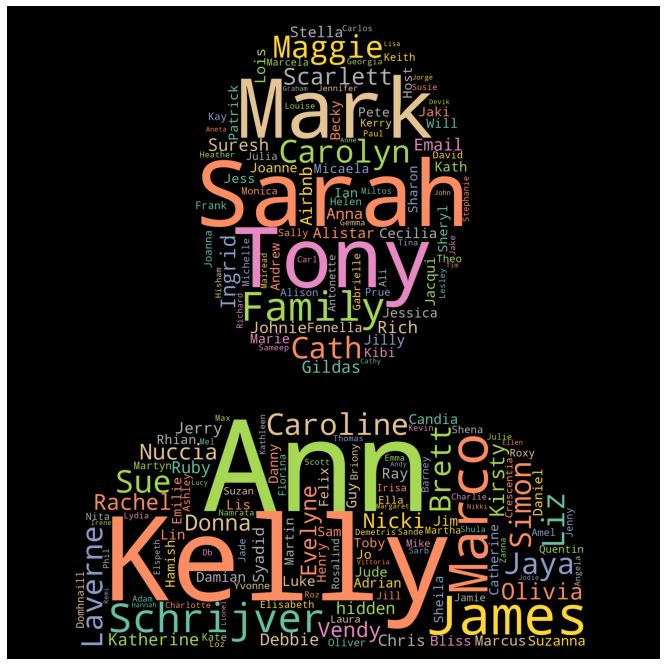

In [16]:

# get a host name based on how many times it's been reviews
host_name = []
for i, host in enumerate(top_rated_hosts["host_name"]):
    for j in range(top_rated_hosts["number_of_reviews"][i].astype(int)):
        name = host   
        host_name.append(name)

host_name = "  ".join(map(str, host_name))

# Import image to np.array
mask = np.array(Image.open('user.png'))
wordcloud = WordCloud(width = 1000, height = 750, random_state=42, background_color='black', 
                      colormap='Set2', collocations=False, stopwords = STOPWORDS, mask=mask).generate(host_name)

# Plot
plot_cloud(wordcloud)

Top rated hostel description and their graph

In [17]:
top_rated_hostel_description = df.groupby(["name"], sort = True)["number_of_reviews"].mean().sort_values()
top_rated_hostel_description = pd.DataFrame(top_rated_hostel_description).reset_index()
top_rated_hostel_description

,name,number_of_reviews
0,"""3 bed house only 2.7miles from Train station""",0.0
1,Student Only Property: Fashioned Gold Studio -...,0.0
2,"Beautiful large, comfortable Bristol townhouse",0.0
3,Student Only Property: Fashioned Studio - 12 m...,0.0
4,City centre living.,0.0
...,...,...
1451,Stunning traditional flat in the heart of Bristol,467.0
1452,Views. Sleeps 1-4. Ensuite. Kitchenette. Parking.,545.0
1453,Comfortable and Clean Flat - Great Location,588.0
1454,"Beautiful room and bathroom, central location",622.0


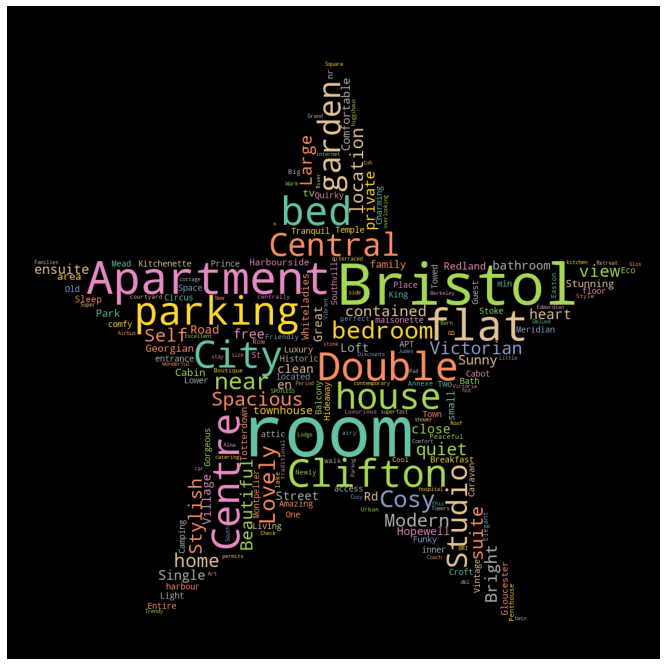

In [18]:

# get a hostel description based on how many times it's been reviews
hostel_description = []
for i, hostel in enumerate(top_rated_hostel_description["name"]):
    for j in range(top_rated_hostel_description["number_of_reviews"][i].astype(int)):
        hostel_descrip = hostel   
        hostel_description.append(hostel_descrip)

hostel_description = "  ".join(map(str, hostel_description))

# Import image to np.array
mask = np.array(Image.open('star.png'))
wordcloud = WordCloud(width = 1000, height = 750, random_state=42, background_color='black', 
                      colormap='Set2', collocations=False, stopwords = STOPWORDS, mask=mask).generate(hostel_description)

# Plot
plot_cloud(wordcloud)

**Histogram graph**

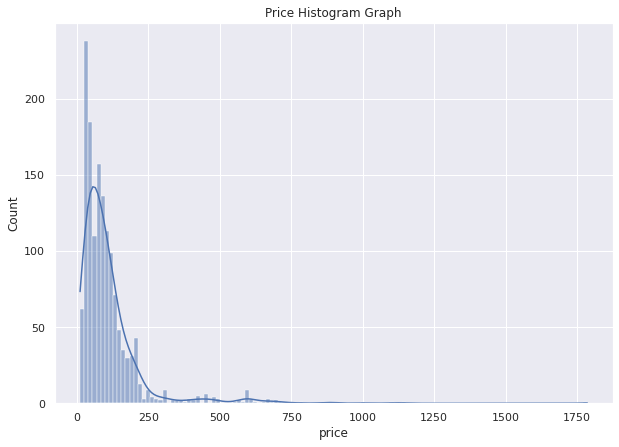

In [19]:
plt.figure(figsize=(10,7))
sns.histplot(data=df, x="price", kde=True)
plt.title("Price Histogram Graph")
plt.show()

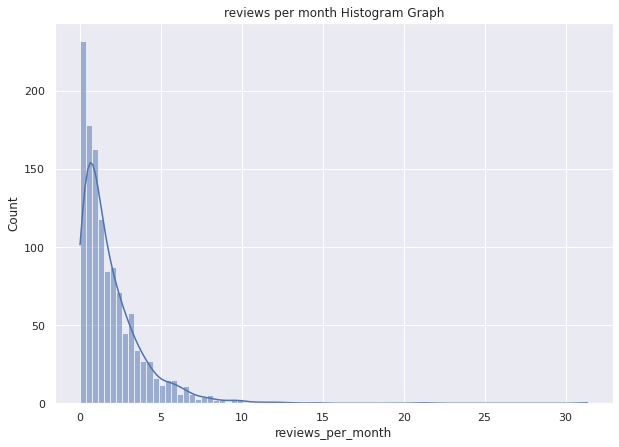

In [20]:
plt.figure(figsize=(10,7))
sns.histplot(data=df, x="reviews_per_month", kde=True)
plt.title("reviews per month Histogram Graph")
plt.show()

## Normality Test

In [21]:
shapiro_wilk(df)

,Column Name,Statistic,Result
0,price,"Statistics=0.57364, p=0.00000",Sample does not look Gaussian
1,minimum_nights,"Statistics=0.11271, p=0.00000",Sample does not look Gaussian
2,number_of_reviews,"Statistics=0.62554, p=0.00000",Sample does not look Gaussian
3,reviews_per_month,"Statistics=nan, p=1.00000",Sample looks Gaussian
4,calculated_host_listings_count,"Statistics=0.52103, p=0.00000",Sample does not look Gaussian
5,availability_365,"Statistics=0.90430, p=0.00000",Sample does not look Gaussian


**Normalize the data**

In [23]:
df_normalize = df.copy()

In [24]:
df_normalize["price"] = np.log1p(df_normalize["price"])


/home/can/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 4.40 and sigma = 0.74



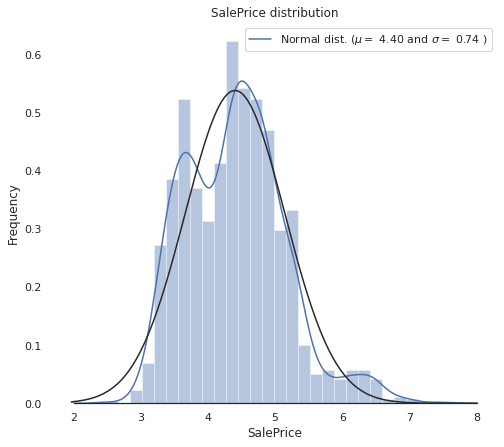

In [25]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(df_normalize['price'] , fit=norm, color="b");

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_normalize['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)

plt.show()

# Lavanya Shukla